## Importing required libraries

In [1]:
## Installing h2o library
! pip install h2o 

In [2]:
# Importing all the required packages
import pandas as pd         #  For data manipulation
import numpy as np          #  For mathematical calculations
%matplotlib inline         
import matplotlib.pyplot as plt   # For Graphs
import matplotlib.lines as mlines  # For Graphs
from mpl_toolkits.mplot3d import Axes3D  # For Graphs
import seaborn as sns  # For Graphs
import warnings  # For warnings 
import h2o        # For h2o model
from sklearn.model_selection import train_test_split        # For dividing data into training and test set
warnings.filterwarnings("ignore", category=DeprecationWarning)       
from h2o.estimators.gbm import H2OGradientBoostingEstimator        # For h2o Gradient Boosting model
from sklearn.svm import SVC        # For svm model
from sklearn.tree import DecisionTreeClassifier         # For decision tree model
from sklearn.naive_bayes import GaussianNB        # For naive bayes model
from sklearn.metrics import accuracy_score, f1_score         # For performance metrics

In [3]:
# initialize h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 11.0.6+8-b765.1, mixed mode)
  Starting server from E:\Anaconda\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\KALYAN~1\AppData\Local\Temp\tmp_aue97g2
  JVM stdout: C:\Users\KALYAN~1\AppData\Local\Temp\tmp_aue97g2\h2o_kalya_started_from_python.out
  JVM stderr: C:\Users\KALYAN~1\AppData\Local\Temp\tmp_aue97g2\h2o_kalya_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,1 month and 12 days
H2O_cluster_name:,H2O_from_python_kalya_tfgw2t
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.965 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"accepting new members, healthy"


## Data Preparation

In [4]:
# importing data file using pandas library
data = pd.read_csv('PS_20174392719_1491204439457_log.csv')
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Exploratory Data Analysis

In [5]:
# checking for null values in data
data.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [6]:
# calculating fraudulent transfers and cash outs
transfer=data[(data.isFraud==1) & (data.type=='TRANSFER')]
cash_out=data[(data.isFraud==1) & (data.type=='CASH_OUT')]
print('Fraudulent Transfers',len(transfer))
print('Fraudulent Cash Outs',len(cash_out))

Fraudulent Transfers 4097
Fraudulent Cash Outs 4116


In [7]:
# removing duplicates
print(data.loc[data.isFlaggedFraud==1].type.drop_duplicates())

2736446    TRANSFER
Name: type, dtype: object


In [8]:
# calculating number of transaction which are fraud and raised a fraudulent flag
print("Transfers where isFraud is set",len(transfer))
print("Transfers where isFlaggedFraud set",len(data.loc[data.isFlaggedFraud==1]))                

Transfers where isFraud is set 4097
Transfers where isFlaggedFraud set 16


In [9]:
# generating a separate dataset for non-fraud transactions and removing duplicates
notfraud=data.loc[data.isFraud==0]
print(transfer.loc[transfer.nameDest.isin(notfraud.loc[notfraud.type=='CASH_OUT'].nameOrig.drop_duplicates())])

         step      type      amount     nameOrig  oldbalanceOrg  \
1030443    65  TRANSFER  1282971.57  C1175896731     1282971.57   
6039814   486  TRANSFER   214793.32  C2140495649      214793.32   
6362556   738  TRANSFER   814689.88  C2029041842      814689.88   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
1030443             0.0  C1714931087             0.0             0.0        1   
6039814             0.0   C423543548             0.0             0.0        1   
6362556             0.0  C1023330867             0.0             0.0        1   

         isFlaggedFraud  
1030443               0  
6039814               0  
6362556               0  


In [10]:
print("fraudulent tranfer to C423543548 occurs at step 486 and cashout from this account occurs at step",notfraud.loc[(notfraud.type=='CASH_OUT') & (notfraud.nameOrig=="C423543548")].step.values)

fraudulent tranfer to C423543548 occurs at step 486 and cashout from this account occurs at step [185]


In [11]:
# sepating feature and target set
X=data.loc[(data.type=='TRANSFER') | (data.type=='CASH_OUT')]
X=X.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)
Y=X['isFraud']

In [12]:
# converting qualitative values to quantitaive
X.loc[X.type=='TRANSFER','type']=0
X.loc[X.type=='CASH_OUT','type']=1
X.type=X.type.astype(int)
X.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,0,181.00,181.00,0.0,0.0,0.00,1
3,1,1,181.00,181.00,0.0,21182.0,0.00,1
15,1,1,229133.94,15325.00,0.0,5083.0,51513.44,0
19,1,0,215310.30,705.00,0.0,22425.0,0.00,0
24,1,0,311685.89,10835.00,0.0,6267.0,2719172.89,0
42,1,1,110414.71,26845.41,0.0,288800.0,2415.16,0
47,1,1,56953.90,1942.02,0.0,70253.0,64106.18,0
48,1,1,5346.89,0.00,0.0,652637.0,6453430.91,0
51,1,1,23261.30,20411.53,0.0,25742.0,0.00,0
58,1,0,62610.80,79114.00,16503.2,517.0,8383.29,0


In [13]:
# checking for data balance
Xfraud=X.loc[Y==1]
Xnonfraud=X.loc[Y==0]
print("The fraction of fraudulent transactions with oldbalanceDest= newbalanceDest= 0 although the transacted amount is non-zero is:\n",len(Xfraud.loc[(Xfraud.oldbalanceDest==0) & (Xfraud.newbalanceDest==0)])/len(Xfraud))

The fraction of fraudulent transactions with oldbalanceDest= newbalanceDest= 0 although the transacted amount is non-zero is:
 0.49628637525873615


In [14]:
print("The fraction of fraudulent transactions with oldbalanceOrg= newbalanceOrig= 0 although the transacted amount is non-zero is:\n",len(Xfraud.loc[(Xfraud.oldbalanceOrg==0) & (Xfraud.newbalanceOrig==0)])/len(Xfraud))

The fraction of fraudulent transactions with oldbalanceOrg= newbalanceOrig= 0 although the transacted amount is non-zero is:
 0.00499208571776452


In [15]:
print("The fraction of genuine transactions with oldbalanceOrg= newbalanceOrig= 0 although the transacted amount is non-zero is:\n",len(Xnonfraud.loc[(Xnonfraud.oldbalanceOrg==0) & (Xnonfraud.newbalanceOrig==0)])/len(Xnonfraud))

The fraction of genuine transactions with oldbalanceOrg= newbalanceOrig= 0 although the transacted amount is non-zero is:
 0.4737321319703598


In [16]:
X.loc[(X.oldbalanceDest==0) & (X.newbalanceDest==0) & (X.amount!=0),['oldbalanceDest','newbalanceDest']]=-1
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,0,181.00,181.0,0.0,-1.0,-1.00,1
3,1,1,181.00,181.0,0.0,21182.0,0.00,1
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [17]:
data=X
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,0,181.00,181.00,0.0,-1.00,-1.00,1
3,1,1,181.00,181.00,0.0,21182.00,0.00,1
15,1,1,229133.94,15325.00,0.0,5083.00,51513.44,0
19,1,0,215310.30,705.00,0.0,22425.00,0.00,0
24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,0,6311409.28,6311409.28,0.0,-1.00,-1.00,1
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,0,850002.52,850002.52,0.0,-1.00,-1.00,1


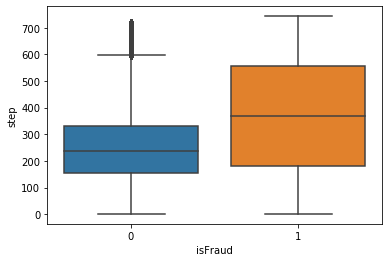

In [18]:
# check for outliers
sns.boxplot(x='isFraud',y='step',data=X)

In [19]:
# checking skewness in data
print('skew = {}'.format( len(Xfraud) / float(len(X)) ))

skew = 0.002964544224336551


In [20]:
Y

2          1
3          1
15         0
19         0
24         0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 2770409, dtype: int64

## Data Preparation

In [21]:
# dividing data into training and test set
X_train,X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [22]:
# Parsing data frame into h2o framework
hf = h2o.H2OFrame(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [23]:
# initialize h2o data features and target and splitting data into train, test and validation set
features = ['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
target = "isFraud"
train,test,valid = hf.split_frame(ratios=[.7,.15])
train

step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1,0,181,181,0,-1,-1,1
1,1,181,181,0,21182,0,1
1,0,215310,705,0,22425,0,0
1,1,110415,26845.4,0,288800,2415.16,0
1,1,5346.89,0,0,652637,6.45343e+06,0
1,1,47458.9,209535,162076,52120,0,0
1,1,94253.3,25203,0,99773,965870,0
1,0,42712.4,10363.4,0,57901.7,24044.2,0
1,0,77957.7,0,0,94900,22233.7,0
1,0,17231.5,0,0,24672,0,0


## H2O

In [24]:
#generating h2o gbm model and training model
gbm = H2OGradientBoostingEstimator()
gbm.train(x=features, y=target, training_frame=train)

## Showing a detailed model summary
print(gbm)

gbm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1597174147597_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,19293.0,5.0,5.0,5.0,20.0,31.0,25.98




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0009376817100839221
RMSE: 0.03062158895426431
MAE: 0.0024681842606897294
RMSLE: 0.020989002711260547
Mean Residual Deviance: 0.0009376817100839221

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-08-11 20:30:05,0.019 sec,0.0,0.054500,0.005940,0.002970
1,,2020-08-11 20:30:07,1.897 sec,1.0,0.052488,0.005714,0.002755
2,,2020-08-11 20:30:07,2.414 sec,2.0,0.050727,0.005503,0.002573
3,,2020-08-11 20:30:08,2.732 sec,3.0,0.049302,0.005321,0.002431
4,,2020-08-11 20:30:08,3.052 sec,4.0,0.048065,0.005150,0.002310
5,,2020-08-11 20:30:08,3.369 sec,5.0,0.046996,0.004993,0.002209
6,,2020-08-11 20:30:08,3.709 sec,6.0,0.046109,0.004853,0.002126
7,,2020-08-11 20:30:09,4.003 sec,7.0,0.045239,0.004712,0.002047
8,,2020-08-11 20:30:13,8.220 sec,23.0,0.035378,0.003154,0.001252
9,,2020-08-11 20:30:17,12.352 sec,39.0,0.031645,0.002566,0.001001



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,oldbalanceOrg,5696.613281,1.000000,0.274607
1,amount,4454.478027,0.781952,0.214730
2,type,4092.945068,0.718487,0.197302
3,newbalanceOrig,2628.164795,0.461356,0.126692
4,step,2221.956543,0.390049,0.107110
5,newbalanceDest,1374.099609,0.241213,0.066239
6,oldbalanceDest,276.311249,0.048504,0.013320


In [25]:
## Getting the AUC on the validation set
perf = gbm.model_performance(valid)
perf.r2()

0.6674458200644964

In [26]:
# accuracy
perf.auc


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.0009686581147156205
RMSE: 0.03112327287923975
MAE: 0.0024968248439041015
RMSLE: 0.021365684662979372
Mean Residual Deviance: 0.0009686581147156205


<bound method MetricsBase.auc of >

In [27]:
# shutting down h2o instance
h2o.shutdown()

H2O session _sid_8025 closed.


## Support Vector Machine (SVM)

In [28]:
# SVM model intialization and generating pipeline for scaling variabke for svm model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
svm_model = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel='linear'))])

In [29]:
# training model
svm_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [30]:
# prediction
ypred= svm_model.predict(X_test)

In [31]:
# calculating accuracy score
accuracy_score(y_test,ypred)

1.0

In [32]:
# calculating f1 score
f1_score(y_test,ypred)

1.0

## Decision Tree

In [33]:
# decision tree model intialization
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)

In [34]:
# training model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [35]:
# prediction
ypred= decision_tree.predict(X_test)

In [36]:
# calculating accuracy score
accuracy_score(y_test,ypred)

1.0

In [37]:
# calculating f1 score
f1_score(y_test,ypred)

1.0

## Naive Bayes

In [38]:
# naive bayes model intialization
clf = GaussianNB()

In [39]:
# training model
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
# prediction
ypred= clf.predict(X_test)

In [41]:
# calculating accuracy score
accuracy_score(y_test,ypred)

0.9854052889885131

In [42]:
# calculating f1 score
f1_score(y_test,ypred)

0.13959426869059438